<a href="https://colab.research.google.com/github/rangaraju1/ML-Projects/blob/main/medical_insurance_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/PythonCourseTexasUniv/LinearRegression/insurance.csv'
insurance = pd.read_csv(path)

In [6]:
data = insurance.copy()

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.shape

(1338, 7)

In [9]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
data['bmi_log'] = np.log(data['bmi'])

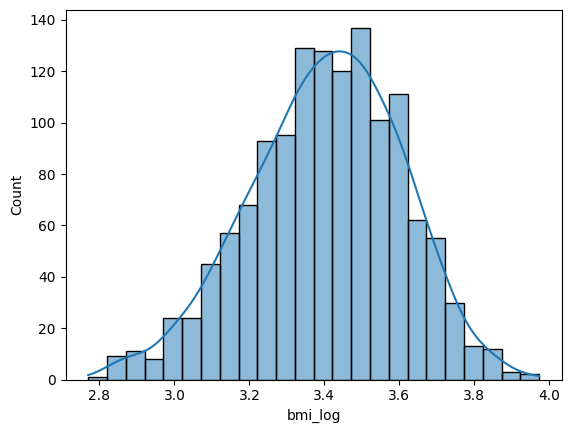

In [11]:
sns.histplot(data['bmi_log'], kde=True)
plt.show()

In [12]:
median_charges_by_region = data.groupby('region')['charges'].median()
print(median_charges_by_region)

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64


In [13]:
highest_median_region = median_charges_by_region.idxmax()
highest_median_value = median_charges_by_region.max()
print("Region with highest median charge:", highest_median_region)
print("Median charge value:", highest_median_value)

Region with highest median charge: northeast
Median charge value: 10057.652025


In [14]:
correlation = data['age'].corr(data['charges'])

print("Correlation between age and charges:", correlation)

Correlation between age and charges: 0.29900819333064754


In [16]:
# Create dummy variables for all categorical columns with drop_first=True
data_dummies = pd.get_dummies(data, drop_first=True)


# Identify the categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Get the dummy variable columns related to 'region'
region_dummies = [col for col in data_dummies.columns if col.startswith('region_')]

# Output
print("Categorical columns:", categorical_cols)
print("Region dummy variables created:", region_dummies)
print("Dropped region dummy variable:",
      sorted(data['region'].unique())[0])  # The first alphabetically dropped

Categorical columns: ['sex', 'smoker', 'region']
Region dummy variables created: ['region_northwest', 'region_southeast', 'region_southwest']
Dropped region dummy variable: northeast


In [17]:
# Drop the column containing the log-transformed BMI values (if present)
data = data.drop(columns=['bmi_log'], errors='ignore')

# Split into train (70%) and test (30%)
train_data, test_data = train_test_split(data, test_size=0.30, random_state=1)

# Number of rows in the test set
print("Test set rows:", len(test_data))

Test set rows: 402


In [18]:
# Split into features and target
X = data_dummies.drop(columns=['charges'])
y = data_dummies['charges']

# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the intercept
print("Intercept:", lr.intercept_)

Intercept: -29228.892770868668


In [19]:
# R-squared on the training set
r2_train = lr.score(X_train, y_train)
print("R-squared on train set:", r2_train)

R-squared on train set: 0.754828559380007


In [20]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse_test)

RMSE on test set: 6052.16649625522


In [21]:
# Calculate MAE on the test set
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", mae_test)

MAE on test set: 4189.843584658054
